In [1]:
from experiments.ONSD.ARUNet_Nerve_Network import ARUNet_Nerve_Network
from utils.ARGUS_vfold_setup import *
from utils.ARGUS_UNet_train_test import *
from utils.ARGUS_visualization import *
import argparse

In [2]:
img_folder = "/data/barry.ravichandran/repos/AnatomicRecon-POCUS-AI/ONSD/Data_ONSD/Preprocessed/Resized/"
annotations_folder = "/data/barry.ravichandran/repos/AnatomicRecon-POCUS-AI/ONSD/Data_ONSD/Annotations/CLEANED/Resized/"

p_prefix = [
' 158',
' 64',
' 139',
' 87',
' 117',
' 130',
' 205',
' 209',
' 213'
]
n_prefix = [
' 23',
' 108',
' 119',
' 129',
' 163',
' 191',
' 228',
' 250'
]

myNetwork = ARUNet_Nerve_Network()

In [3]:
setup_vfold_files(myNetwork,
                img_dir=img_folder,
                anno_dir=annotations_folder,
                p_prefix=p_prefix,
                n_prefix=n_prefix)



Total size of images in the dataset: 
2.457046715542674 gibibyte


Total size of labels in the dataset: 
0.0038273120298981667 gibibyte


Num images / labels = 19 19


0 [[' 158'], [' 23']]
1 [[' 64'], [' 108']]
2 [[' 139'], [' 119']]
3 [[' 87'], [' 129']]
4 [[' 117'], [' 163']]
5 [[' 130'], [' 191']]
6 [[' 205'], [' 209'], [' 228']]
7 [[' 213'], [' 250']]


13 3 3
13 3 3
14 3 2
15 2 2
15 2 2
15 2 2
15 2 2
14 2 3


Loading dataset: 100%|██████████| 3/3 [00:03<00:00,  1.21s/it]


VFOLD = 0 of 7
Image: 10. 250.1 Left Lat_Video 1_cropM.nii.gz


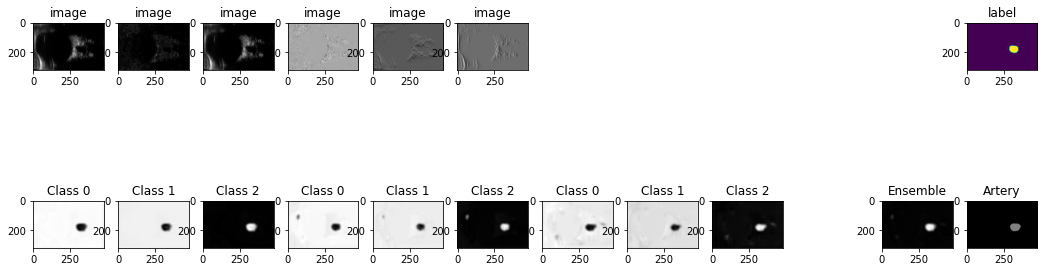

Image: 3. 250.1 Right Lat_Video 2_cropM.nii.gz


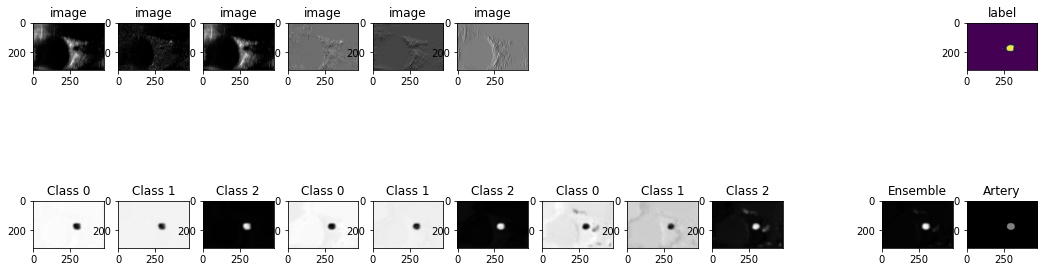

Image: 9. 213.1 Left Long_Video 1_cropM.nii.gz


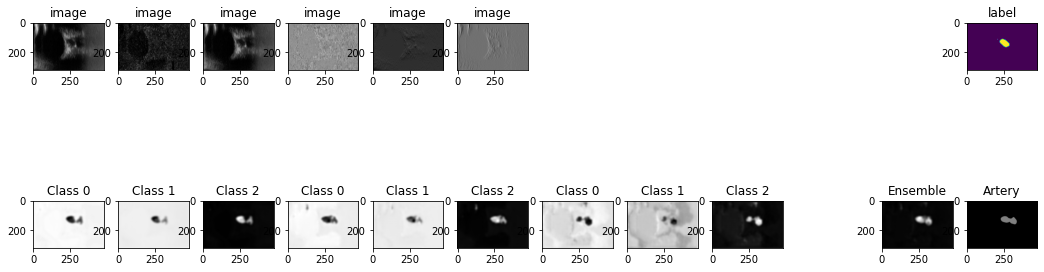

Loading dataset: 100%|██████████| 3/3 [00:03<00:00,  1.06s/it]


VFOLD = 1 of 7
Image: 2. 158.1 Right_Lat_Video 1_cropM.nii.gz


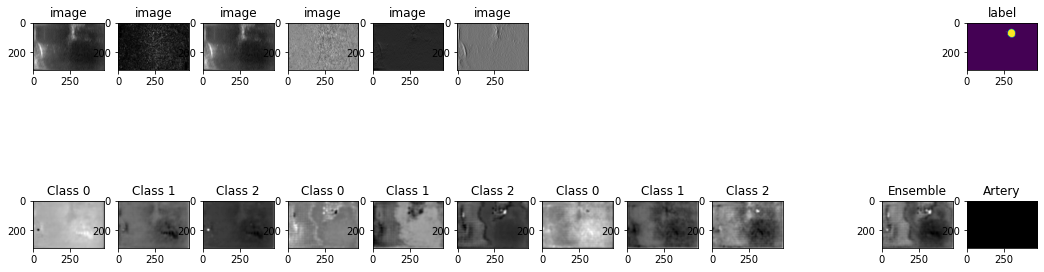

Image: 4. 23.1 Right_Long_Video 1_cropM.nii.gz


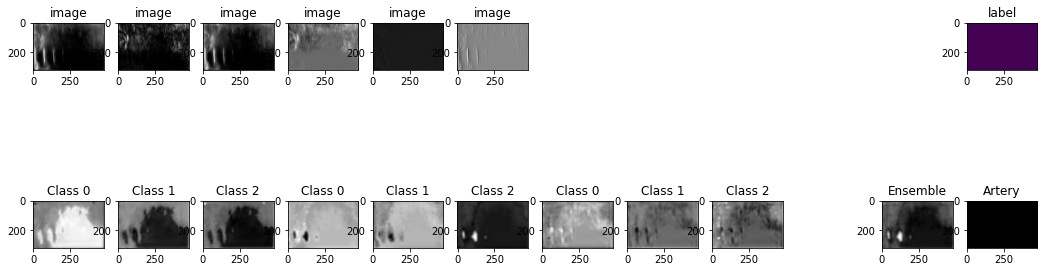

Image: 8. 23.1 Left_Lat_Video 2_cropM.nii.gz


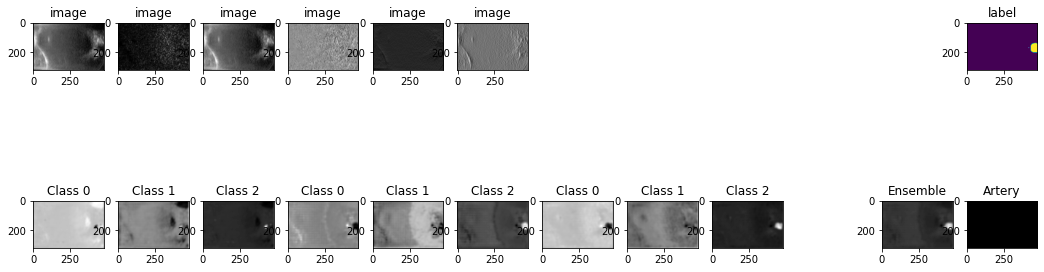

Loading dataset: 100%|██████████| 2/2 [00:02<00:00,  1.42s/it]


VFOLD = 2 of 7
Image: 2. 64.1 Right Lat_Video 1_cropM.nii.gz


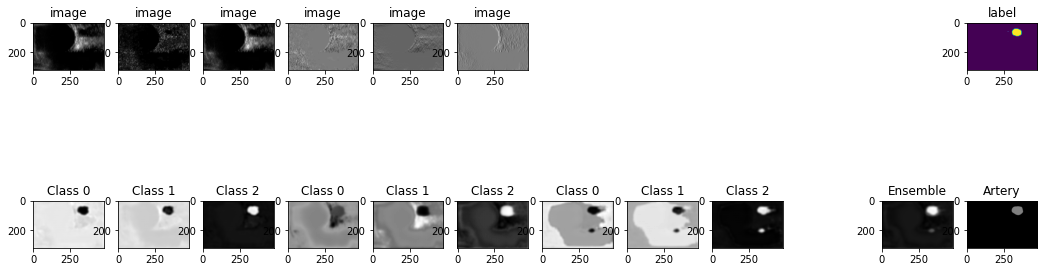

Image: 7. 108.1 Left_Lat_Video 1_cropM.nii.gz


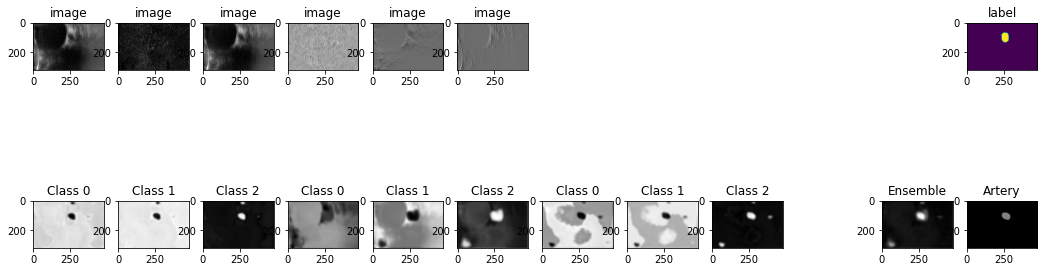

Loading dataset: 100%|██████████| 2/2 [00:02<00:00,  1.10s/it]


VFOLD = 3 of 7
Image: 2. 119.1 Right_Lat_Video 1_cropM.nii.gz


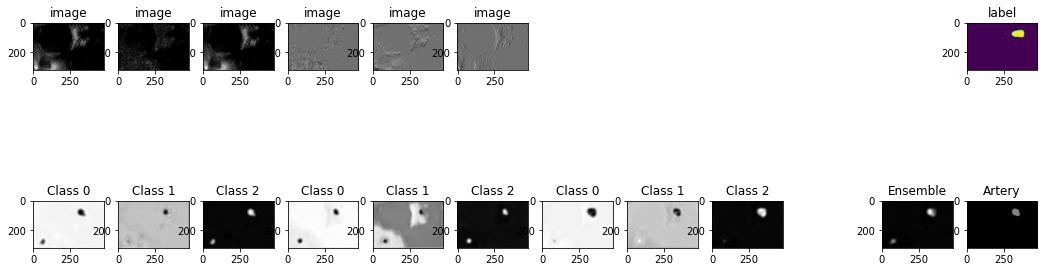

Image: 4. 139.1 Right Long_Video 1_cropM.nii.gz


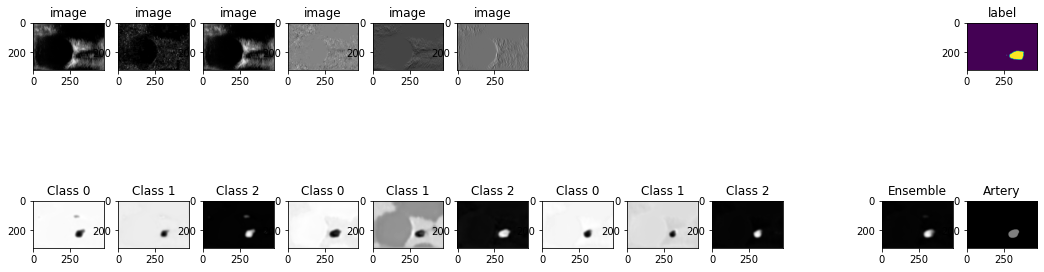

Loading dataset: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


VFOLD = 4 of 7
Image: 4. 87.2 Right Long_Video 1_cropM.nii.gz


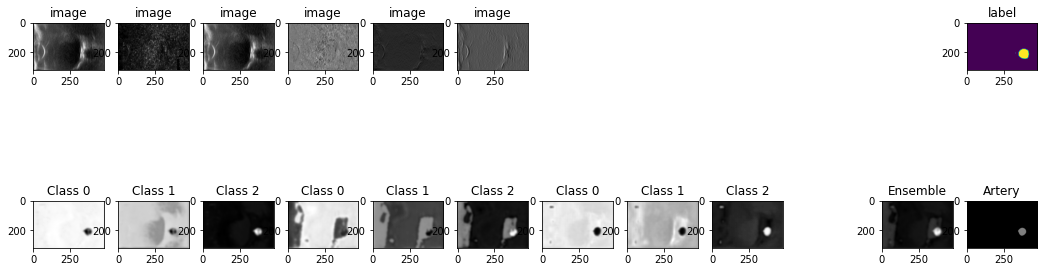

Image: 6. 129.1 Left_Lat_Video 1_cropM.nii.gz


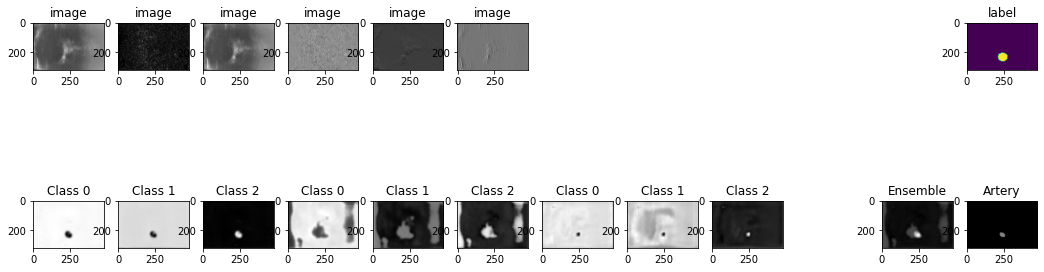

Loading dataset: 100%|██████████| 2/2 [00:02<00:00,  1.35s/it]


VFOLD = 5 of 7
Image: 2. 163.2 Right_Lat_Video 1_cropM.nii.gz


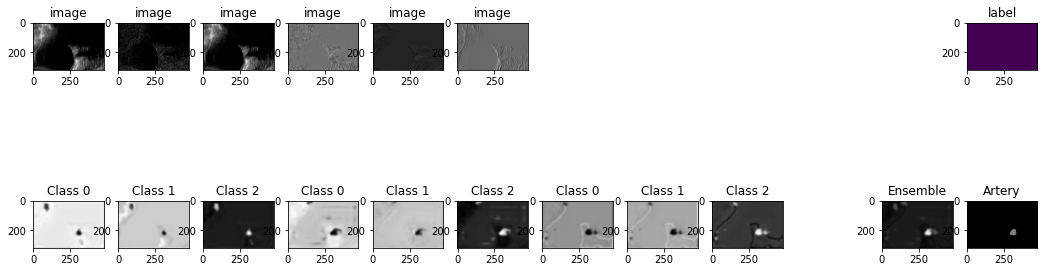

Image: 6. 117.1 Left Lat_Video 1_cropM.nii.gz


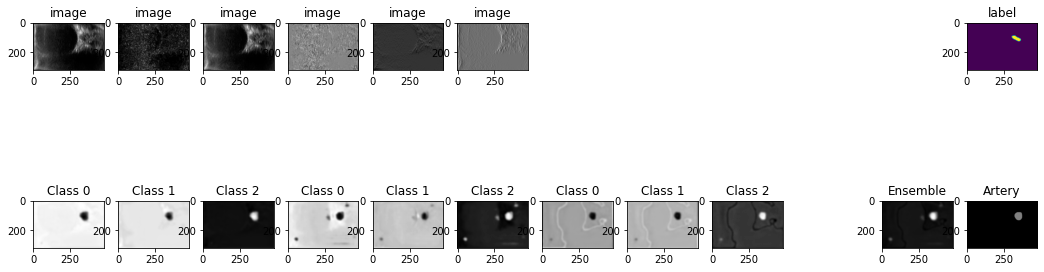

Loading dataset: 100%|██████████| 2/2 [00:02<00:00,  1.10s/it]


VFOLD = 6 of 7
Image: 4. 191.1 Right Long_Video 1_cropM.nii.gz


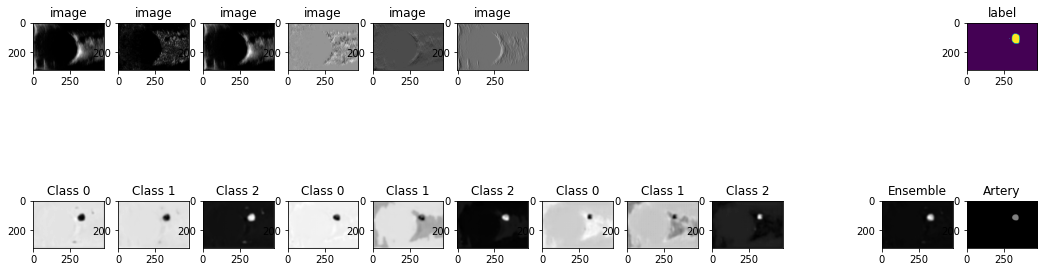

Image: 7. 130.1 Left_Lat_Video 2_cropM.nii.gz


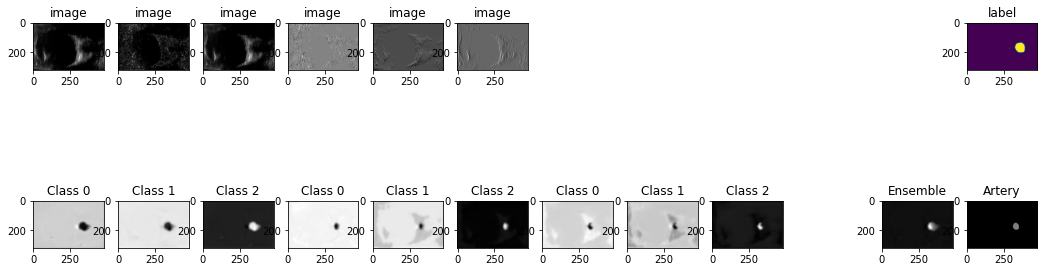

Loading dataset: 100%|██████████| 3/3 [00:03<00:00,  1.28s/it]


VFOLD = 7 of 7
Image: 2. 228.1 Right Lat_Video 1_cropM.nii.gz


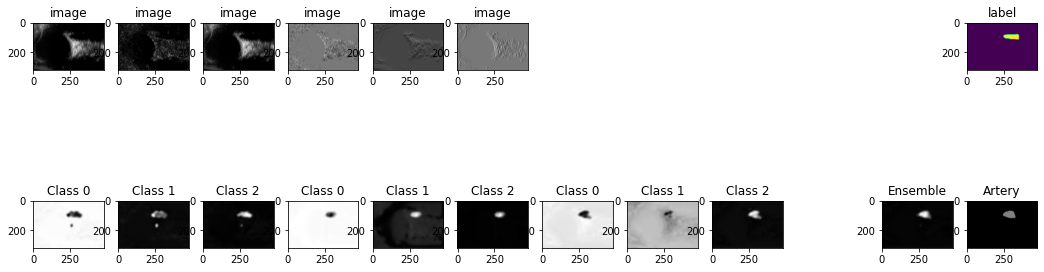

Image: 8. 205.1 Left Long_Video 1_cropM.nii.gz


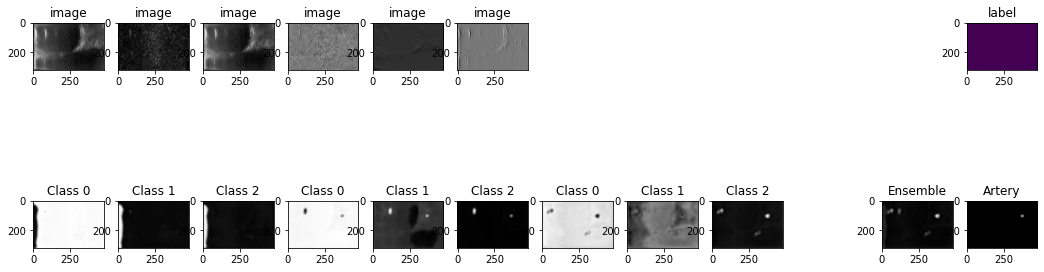

Image: 9. 209.1 Left_Long_Video 1_cropM.nii.gz


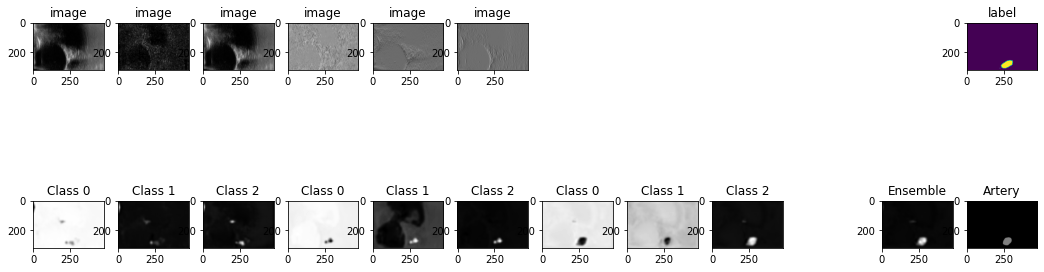

In [4]:
runs = [0,1,2]
for i in range(myNetwork.num_folds):
    setup_testing_vfold(myNetwork,
                        vfold_num=i)
    test_outputs_list = []
    test_images_list = []
    test_labels_list = []
    for r in runs:
        test_outputs, test_images, test_labels = test_vfold(myNetwork, model_type="best", run_id=r, device_num=0)
        test_outputs_list.append(test_outputs)
        test_images_list.append(test_images)
        test_labels_list.append(test_labels)
    view_testing_results_vfold(myNetwork,
                            test_outputs=test_outputs_list,
                            test_images=test_images_list,
                            test_labels=test_labels_list,
                            model_type="best",
                            run_id=runs, 
                            device_num=3)

In [ ]:
import ipyparams
currentNotebook = "ARUNet-ONSD-Nerve-VFold-Test.ipynb"
exp = "EnsembleClassPriorsTest-ONSD-Mean_StdOverTime_RawFrame_Gradient-LabelTrue-320x480-3s"

from datetime import datetime
now = datetime.now()
print(str(currentNotebook))
experimentName = exp+now.strftime("-%Y.%m.%d_%H.%M")
print(experimentName)
cmd = "jupyter nbconvert "+currentNotebook+" --output "+experimentName+" --to pdf"
import subprocess
subprocess.call(cmd, shell=True)